# Inclusion financière en Afrique

## 0. Préalable

### Importation des modules

In [17]:
# analyse de données
import numpy as np
import pandas as pd
# vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
# models
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# encoding
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from datetime import datetime as dt


### Chargement du jeu de données

In [3]:
DATA_PATH = 'data/'
train_set = pd.read_csv(DATA_PATH + 'Train.csv') # ensemble d'apprentissage
test_set = pd.read_csv(DATA_PATH + 'Test.csv') # ensemble de test
train_set.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
22649,Uganda,2018,uniqueid_1227,No,Rural,Yes,8,52,Female,Spouse,Married/Living together,Secondary education,Self employed
19111,Tanzania,2017,uniqueid_4309,No,Urban,Yes,3,35,Male,Head of Household,Single/Never Married,Primary education,Self employed
5784,Kenya,2018,uniqueid_5785,No,Rural,Yes,13,17,Female,Other relative,Married/Living together,Primary education,Informally employed
4292,Kenya,2018,uniqueid_4293,No,Urban,Yes,1,37,Female,Head of Household,Married/Living together,Secondary education,Informally employed
11753,Rwanda,2016,uniqueid_5686,No,Rural,Yes,3,44,Female,Head of Household,Divorced/Seperated,Primary education,Self employed


## 1. Analyse exploratoire

### 1.1. Analyse de la forme

La target de notre dataset est la variable **bank_account**.

Dimension du dataset

In [3]:
# Let’s observe the shape of our datasets.
print('Dimension du train set :', train_set.shape)
print('Dimension du test set :', test_set.shape)

Dimension du train set : (23524, 13)
Dimension du test set : (10086, 12)


Types des variables

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


Ce dataset comporte **3 variables quantitatives** et **10 variables qualitatives**.

Analyse des variables qualitatives

In [5]:
train_set.select_dtypes(include='object').describe()

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [6]:
for colonne in list(train_set.columns):
    print(colonne)
    print(train_set[colonne].value_counts(), '\n')

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64 

year
2016    8735
2018    8169
2017    6620
Name: year, dtype: int64 

uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: uniqueid, Length: 8735, dtype: int64 

bank_account
No     20212
Yes     3312
Name: bank_account, dtype: int64 

location_type
Rural    14343
Urban     9181
Name: location_type, dtype: int64 

cellphone_access
Yes    17454
No      6070
Name: cellphone_access, dtype: int64 

household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: household_size, dtype: int64 

age_of_respondent
30     1056
35      836
25      79

Analyse des variables quantitatives

In [7]:
train_set.select_dtypes(include='number').describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


Analyse des données manquantes

In [8]:
train_set.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Super ! Notre dataset ne contient aucune donnée manquante.

Il n'y a aucun outlier dans ce dataset.

### 1.2. Analyse du fond

Analyse et visualisation de la target (bank_account)

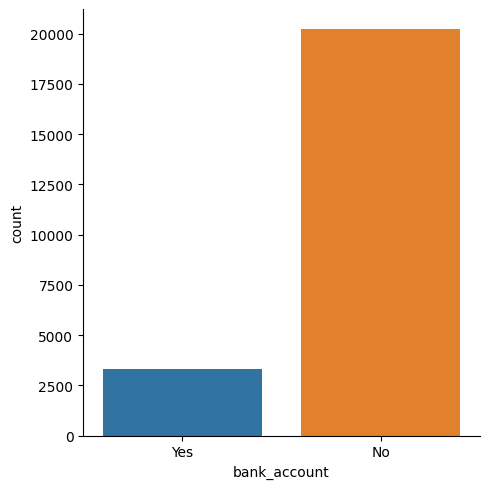

In [9]:
# explorons la distribution de la target
sns.catplot(data=train_set, x="bank_account", kind="count")
plt.show()

Compréhension des diffiérentes variables

In [4]:
variables_definitions = pd.read_csv(DATA_PATH + 'VariableDefinitions.csv') # schema de definition des variables
variables_definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


## 2. Pré-traitement

Fonction réalisant le pré-traitement de notre dataset

In [6]:
def preprocessing_data(data: pd.DataFrame) -> pd.DataFrame:
    ''' Réalise la phase de pré-traitement d'un dataset à savoir l'encodage 
    des variables discrètes et la normalisation de toutes les variables 
    '''
    # copie du dataset
    data1 = data.copy()
    # suppression de la variable d'identifiants uniques
    data1.drop('uniqueid', axis=1, inplace=True)
    # la liste des colonnes discrètes
    object_columns = list(data1.select_dtypes(include='object').columns)
    # encodage des variables discrètes
    encoder = OrdinalEncoder()
    data1[object_columns] = encoder.fit_transform(data1[object_columns])
    # normalisation
    scaler = MinMaxScaler()
    data1[data1.columns] = scaler.fit_transform(data1)
    return data1

In [8]:
processed_train = preprocessing_data(train_set)
processed_test = preprocessing_data(test_set)
# processed_test.head(3)

Séparation des features et de la target

In [9]:
X_train = processed_train.drop(['bank_account'], axis=1)
y_train = processed_train['bank_account']
X_train

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0.0,1.0,0.0,1.0,0.10,0.095238,0.0,1.0,0.50,0.6,1.000000
1,0.0,1.0,0.0,0.0,0.20,0.642857,0.0,0.2,1.00,0.0,0.444444
2,0.0,1.0,1.0,1.0,0.20,0.119048,1.0,0.6,0.75,1.0,1.000000
3,0.0,1.0,0.0,1.0,0.20,0.214286,0.0,0.2,0.50,0.4,0.333333
4,0.0,1.0,1.0,0.0,0.35,0.119048,1.0,0.0,0.75,0.4,0.555556
...,...,...,...,...,...,...,...,...,...,...,...
23519,1.0,1.0,0.0,1.0,0.15,0.380952,0.0,0.2,0.00,0.0,0.777778
23520,1.0,1.0,0.0,1.0,0.05,0.130952,0.0,0.2,0.75,0.6,0.777778
23521,1.0,1.0,0.0,1.0,0.20,0.130952,0.0,0.8,1.00,0.4,0.777778
23522,1.0,1.0,1.0,1.0,0.30,0.166667,0.0,0.8,0.00,0.6,1.000000


Matrice de corrélation de toutes les variables

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Corrélation des features", y=1.05, size=15)
sns.heatmap(processed_train.corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=plt.cm.PuBu, linecolor="white", annot=True, annot_kws={"size": 16})

## 3. Modélisation

### 3.1. Choix du meilleur modèle

In [11]:
X_Train, X_Val, y_Train, y_Val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.1, random_state=12)

Entraînement de plusieurs modèles

In [7]:
# knn = KNeighborsClassifier()
GBC = GradientBoostingClassifier()
XGB = XGBClassifier()
LGBM = LGBMClassifier()

classifiers_list = [GBC, XGB, LGBM]

In [12]:
GBC.fit(X_Train, y_Train)

GradientBoostingClassifier()

Algorithme de recherche du meilleur modèle

In [13]:
scores_models = {}
for model in classifiers_list:
    model.fit(X_Train, y_Train)
    y_model = model.predict(X_Val)
    metrique = 1 - accuracy_score(y_Val, y_model)
    scores_models[str(model)] = metrique
    print(f"Taux d'erreur du {str(model)} : {metrique}")

Taux d'erreur du GradientBoostingClassifier() : 0.10284742881427966
Taux d'erreur du XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 0.10369740756481083
Taux d'erreur du LGBMClassifier() : 0.10029749256268594


Algorithme de recherche du meilleur random_state

In [14]:
def index_min_value(d):
    if len(d) == 0:
        return None
    else:
        min_key = min(d, key=d.get)
        return min_key

In [15]:
scores_lgbms = []
for i in range(50):
	X_Train, X_Val, y_Train, y_Val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.1, random_state=i)
	# for model in classifiers_list:
	LGBM.fit(X_Train, y_Train)
	y_lgbm = LGBM.predict(X_Val)
	metrique = 1 - accuracy_score(y_Val, y_lgbm)
	scores_lgbms.append(metrique)
	# print(f"Taux d'erreur du {str(model)} : {metrique}")
	print(i, ' - ', metrique)

0  -  0.10624734381640455
1  -  0.11177220569485757
2  -  0.11262218444538885
3  -  0.11134721631959199
4  -  0.11007224819379513
5  -  0.11474713132171699
6  -  0.11644708882277943
7  -  0.10879728006799827
8  -  0.12154696132596687
9  -  0.11389715257118571
10  -  0.1015724606884828
11  -  0.11092222694432641
12  -  0.10029749256268594
13  -  0.10624734381640455
14  -  0.10752231194220141
15  -  0.11644708882277943
16  -  0.11219719507012327
17  -  0.11007224819379513
18  -  0.11347216319592013
19  -  0.10964725881852955
20  -  0.11644708882277943
21  -  0.10752231194220141
22  -  0.12112197195070118
23  -  0.11262218444538885
24  -  0.11262218444538885
25  -  0.11134721631959199
26  -  0.11007224819379513
27  -  0.11602209944751385
28  -  0.11559711007224815
29  -  0.11049723756906082
30  -  0.10964725881852955
31  -  0.10624734381640455
32  -  0.12027199320017001
33  -  0.11092222694432641
34  -  0.1206969825754356
35  -  0.11219719507012327
36  -  0.10837229069273269
37  -  0.1164

random_state = 12 - 0.10284742881427966
random_state = 


In [16]:
min(scores_models.values())

0.10029749256268594

Le meilleur modèle parmi les modèles précédents est donc le LGBM.

Matrice de confusion

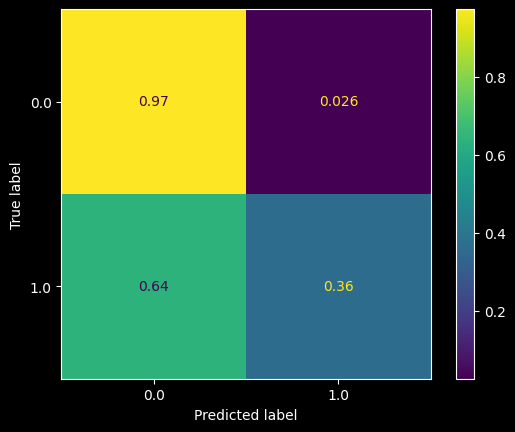

In [18]:
# traçons la matrice de confusion pour le GBC
ConfusionMatrixDisplay.from_estimator(LGBM, X_Val, y_Val, normalize='true')
plt.show()

Cette matrice montre que notre modèle reconnaît mieux les vrais négatifs (l'individu n'a pas de compte bancaire) par rapport aux vrais positifs (l'individu a un compte bancaire). Cela était prévisible car il y a 6 fois plus de négatifs que de positifs dans le dataset.

### 3.3. Optimisation avec GridSearchCV

Soit la liste des hyperparamètres valides pour l'estimateur GradientBoostingClassifier() : ['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start']

In [19]:
params_grid: dict[str, tuple] = {
    'random_state': (0, 10, 20, 30),
    'n_estimators': (10, 20, 30),
    'max_depth': (3, 5, 8),
    'min_samples_leaf': (4, 6, 8),
    'min_samples_split': (4, 8)
}
grid_cv = GridSearchCV(LGBM, params_grid, n_jobs=-1, verbose=2, cv=3)
grid_cv.fit(X_Train, y_Train)
print(grid_cv.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: min_samples_split
{'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 30, 'random_state': 0}


In [20]:
optimized_lgbm = LGBMClassifier(
    max_depth=grid_cv.best_params_['max_depth'], 
	min_samples_leaf=grid_cv.best_params_['min_samples_leaf'], 
	min_samples_split=grid_cv.best_params_['min_samples_split'], 
	n_estimators=grid_cv.best_params_['n_estimators'], 
	random_state=grid_cv.best_params_['random_state']
)

optimized_lgbm.fit(X_Train, y_Train)
y_pred = optimized_lgbm.predict(X_Val)

print("Taux d'erreur de LGBMClassifier : ", 1 - accuracy_score(y_Val, y_pred))
# 0.10114747131321722

Taux d'erreur de LGBMClassifier :  0.11347216319592013


Bon, apparemment les nouveaux hyperparamètres trouvés n'ont pas amélioré le score initial. -_-

Après avoir choisi un modèle, réalisons maintenant les prédictions sur notre ensemble de test.

In [ ]:
# processed_test.drop(['bank_account'], axis=1, inplace=True)

In [21]:
test_set['bank_account'] = LGBM.predict(processed_test)

In [22]:
test_set.head(5)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,1.0
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,1.0
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0.0
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0.0
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0.0


## 4. Soumission

Visualisation du fichier de soumission

In [23]:
sample_submission = pd.read_csv(DATA_PATH + 'SampleSubmission.csv') # exemple de soumission

In [24]:
sample_submission.sample(5)

,unique_id,bank_account
24982,uniqueid_3834 x Tanzania,0
21669,uniqueid_521 x Tanzania,0
26104,uniqueid_4956 x Tanzania,0
23382,uniqueid_2234 x Tanzania,0
13073,uniqueid_4405 x Rwanda,0


Création de notre fichier de soumission

In [25]:
test_set.sample(5)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
6739,Tanzania,2017,uniqueid_7014,Rural,Yes,2,25,Male,Parent,Divorced/Seperated,Tertiary education,Formally employed Private,1.0
490,Kenya,2018,uniqueid_6559,Rural,Yes,2,66,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing,0.0
5973,Rwanda,2016,uniqueid_12108,Urban,Yes,6,47,Male,Head of Household,Married/Living together,Primary education,Other Income,1.0
4454,Rwanda,2016,uniqueid_10589,Rural,Yes,4,33,Female,Spouse,Married/Living together,Primary education,Informally employed,0.0
2549,Kenya,2018,uniqueid_8618,Rural,Yes,10,73,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,0.0


In [26]:
soumissions = pd.DataFrame(
    {"unique_id": test_set["uniqueid"] + " x " + test_set["country"], "bank_account": test_set['bank_account'].astype(int)})
soumissions.to_csv(
    f'submissions/soumission_{dt.now().strftime(format="%Y-%m-%d_%Hh%M")}.csv', index=False)

In [27]:
soumissions.sample(5)

,unique_id,bank_account
6133,uniqueid_12268 x Rwanda,0
9788,uniqueid_2705 x Uganda,0
9451,uniqueid_2368 x Uganda,0
8090,uniqueid_8365 x Tanzania,0
3000,uniqueid_9135 x Rwanda,0
